<a href="https://colab.research.google.com/github/Yahia-M/-Images-Classification-Using-CNNs/blob/master/CiFAR_10_Images_Classification_Using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

In [0]:
import keras
from keras.datasets import cifar10

In [0]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [50]:
x_train.shape

(50000, 32, 32, 3)

In [51]:
x_test.shape

(10000, 32, 32, 3)

## Visualize our Data

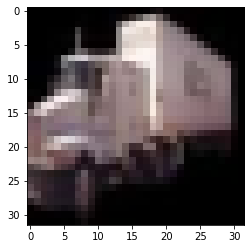

In [52]:
index=np.random.randint(0,5000)
plt.imshow(x_train[index])

In [53]:
print(y_train[index])

[9]


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


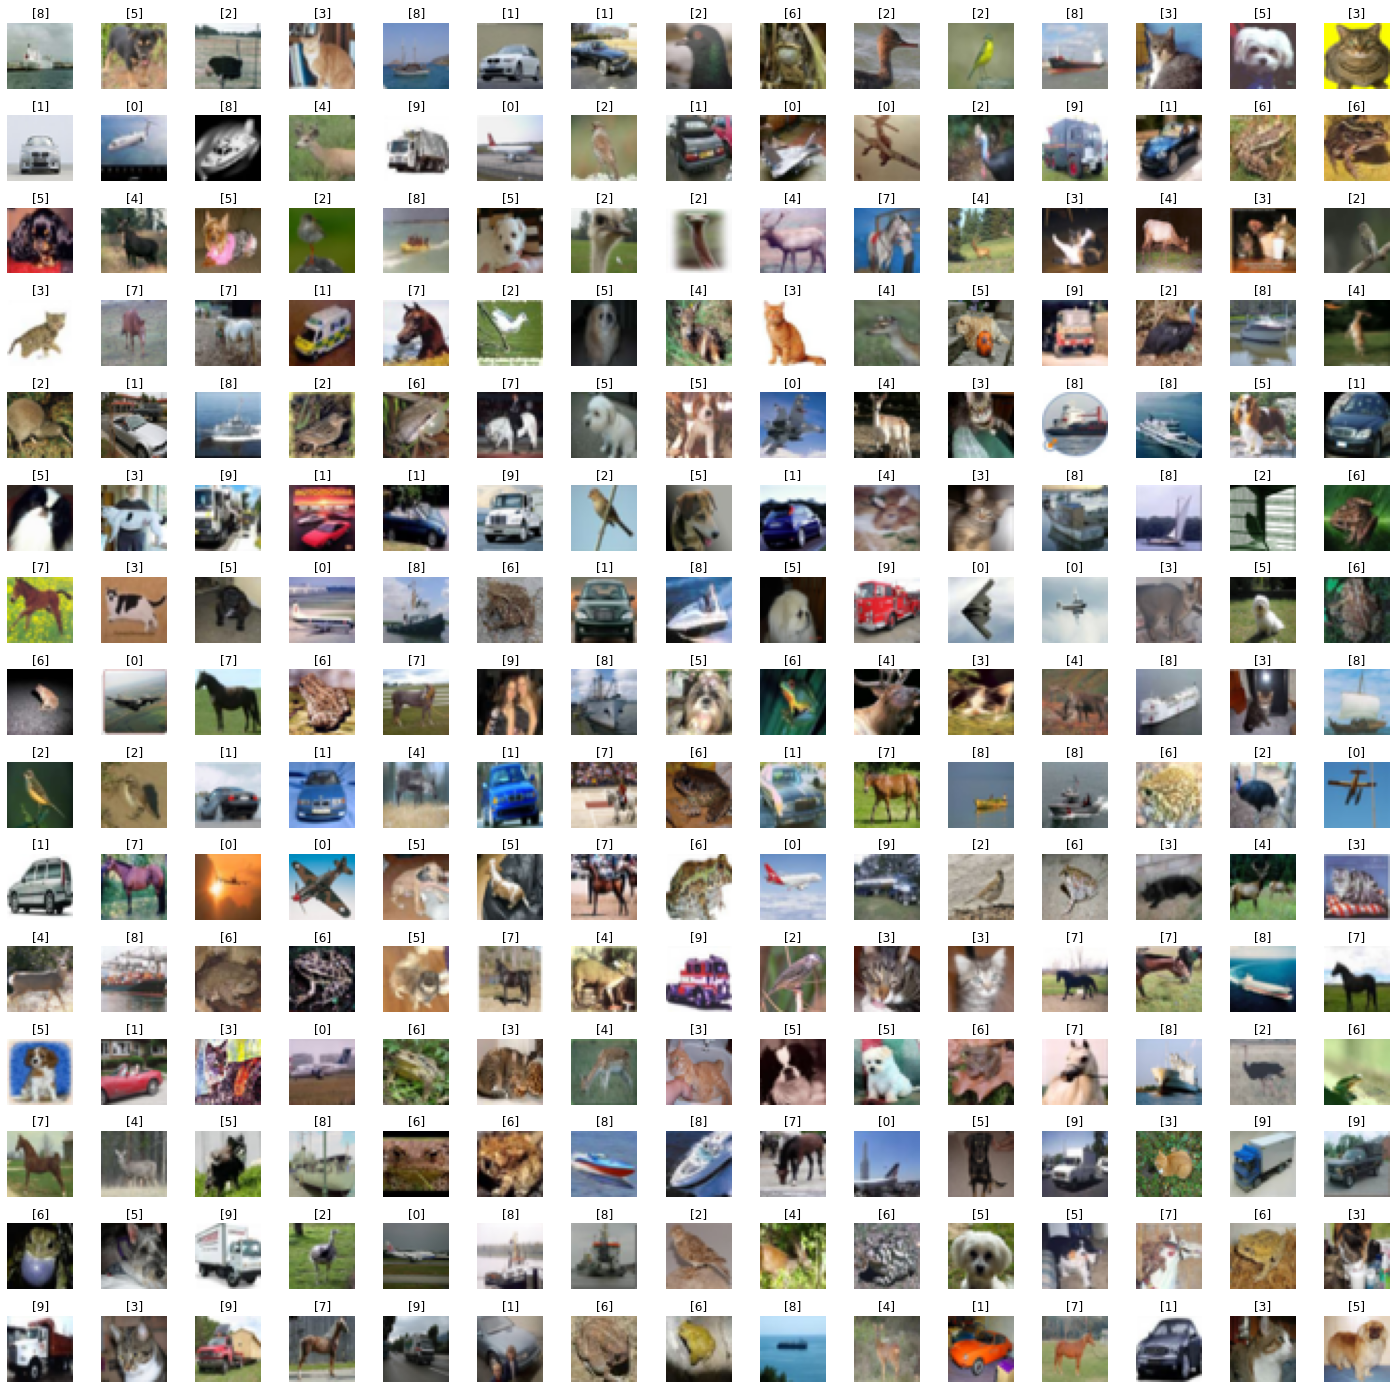

In [54]:
w_grid=15
l_grid=15

fig,axes=plt.subplots(l_grid,w_grid, figsize=(25,25))
axes=axes.ravel()

n_training=len(x_train)
for i in np.arange(0, l_grid * w_grid):
  index = np.random.randint(0,n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [0]:
x_train_flt = x_train.astype("float32")
x_test_flt = x_test.astype("float32")

In [0]:
number_cat = 10
y_train = keras.utils.to_categorical(y_train,number_cat)
y_test = keras.utils.to_categorical(y_test,number_cat)

In [0]:
x_train_flt /= 255
x_test_flt /= 255

In [58]:
x_train_flt.shape

(50000, 32, 32, 3)

In [0]:
Input_shape=x_train_flt.shape[1:]

In [60]:
Input_shape

(32, 32, 3)

## train the model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size=(3,3),activation='relu',input_shape=Input_shape))
model.add(Conv2D(filters = 64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters = 128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(units=number_cat,activation='softmax'))


In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)        

In [64]:
!nvidia-smi

Tue Apr 28 23:34:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    33W / 250W |   1063MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.rmsprop(lr = 0.001),metrics=['accuracy'])

In [66]:
history = model.fit(x_train_flt,y_train,
                    batch_size = 32, epochs = 20, shuffle=True)

Epoch 1/20
50000/50000 [==============================] - 11s 224us/step - loss: 1.6459 - accuracy: 0.4087
Epoch 2/20
50000/50000 [==============================] - 11s 219us/step - loss: 1.2450 - accuracy: 0.5708
Epoch 3/20
50000/50000 [==============================] - 11s 221us/step - loss: 1.1324 - accuracy: 0.6140
Epoch 4/20
50000/50000 [==============================] - 11s 223us/step - loss: 1.0727 - accuracy: 0.6394
Epoch 5/20
50000/50000 [==============================] - 11s 223us/step - loss: 1.0563 - accuracy: 0.6480
Epoch 6/20
50000/50000 [==============================] - 11s 223us/step - loss: 1.0361 - accuracy: 0.6535
Epoch 7/20
50000/50000 [==============================] - 11s 225us/step - loss: 1.0326 - accuracy: 0.6614
Epoch 8/20
50000/50000 [==============================] - 11s 224us/step - loss: 1.0373 - accuracy: 0.6583
Epoch 9/20
50000/50000 [==============================] - 11s 222us/step - loss: 1.0299 - accuracy: 0.6611
Epoch 10/20
50000/50000 [============

In [0]:
model2 = Sequential()
model2.add(Conv2D(filters = 64, kernel_size=(3,3),activation='relu',input_shape=Input_shape))
model2.add(Conv2D(filters = 64, kernel_size=(3,3),activation='relu'))
model2.add(AveragePooling2D(2,2))
model2.add(Dropout(0.3))

model2.add(Conv2D(filters = 128, kernel_size=(3,3),activation='relu'))
model2.add(Conv2D(filters = 128, kernel_size=(3,3),activation='relu'))
model2.add(AveragePooling2D(2,2))
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(1024,activation='relu'))
model2.add(Dense(1024,activation='relu'))
model2.add(Dense(units=number_cat,activation='softmax'))

In [68]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 128)        

In [0]:
model2.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.rmsprop(lr = 0.001),metrics=['accuracy'])

In [70]:
history = model2.fit(x_train_flt,y_train,
                    batch_size = 32, epochs = 20, shuffle=True)

Epoch 1/20
50000/50000 [==============================] - 11s 229us/step - loss: 1.6319 - accuracy: 0.4127
Epoch 2/20
50000/50000 [==============================] - 11s 228us/step - loss: 1.2433 - accuracy: 0.5678
Epoch 3/20
50000/50000 [==============================] - 11s 222us/step - loss: 1.1299 - accuracy: 0.6141
Epoch 4/20
50000/50000 [==============================] - 11s 220us/step - loss: 1.0807 - accuracy: 0.6357
Epoch 5/20
50000/50000 [==============================] - 11s 218us/step - loss: 1.0572 - accuracy: 0.6462
Epoch 6/20
50000/50000 [==============================] - 11s 219us/step - loss: 1.0331 - accuracy: 0.6545
Epoch 7/20
50000/50000 [==============================] - 11s 219us/step - loss: 1.0075 - accuracy: 0.6652
Epoch 8/20
50000/50000 [==============================] - 11s 219us/step - loss: 1.0009 - accuracy: 0.6721
Epoch 9/20
50000/50000 [==============================] - 11s 220us/step - loss: 0.9789 - accuracy: 0.6749
Epoch 10/20
50000/50000 [============

In [71]:
score = model.evaluate(x_test_flt, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8278857721328735
Test accuracy: 0.72079998254776


In [72]:
score = model2.evaluate(x_test_flt, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0705280729293822
Test accuracy: 0.6453999876976013


In [73]:
prediction = model.predict_classes(x_test_flt)
prediction

array([3, 8, 8, ..., 5, 0, 7])

In [74]:
prediction2 = model2.predict_classes(x_test_flt)
prediction2

array([8, 8, 8, ..., 5, 0, 7])

In [0]:
y_test_arg = y_test.argmax(1)

In [77]:
y_test_arg

array([3, 8, 8, ..., 5, 1, 7])

In [0]:
dict={"0":"Airplanes","1":"Cars","2":"Birds","3":"Cats","4":"Deer","5":"Dogs","6":"Frogs","7":"Horses","8":"Ships","9":"Trucks"}

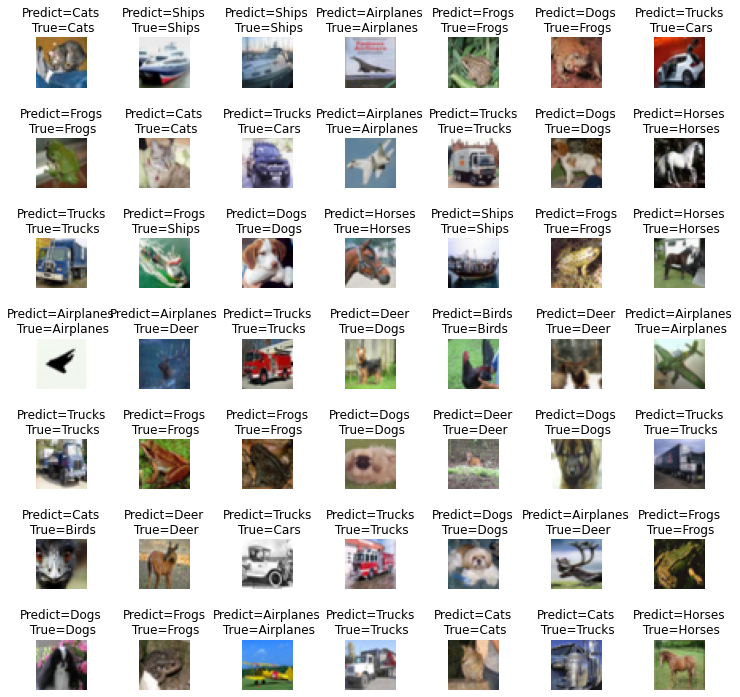

In [85]:
l=7
w=7
fig,axes = plt.subplots(l,w,figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0,l*w):
    axes[i].imshow(x_test_flt[i])
    axes[i].set_title('Predict={}\n True={}'.format(dict[str(prediction[i])],dict[str(y_test_arg[i])]))
    axes[i].axis('off')
plt.subplots_adjust(hspace = 1,wspace=1)

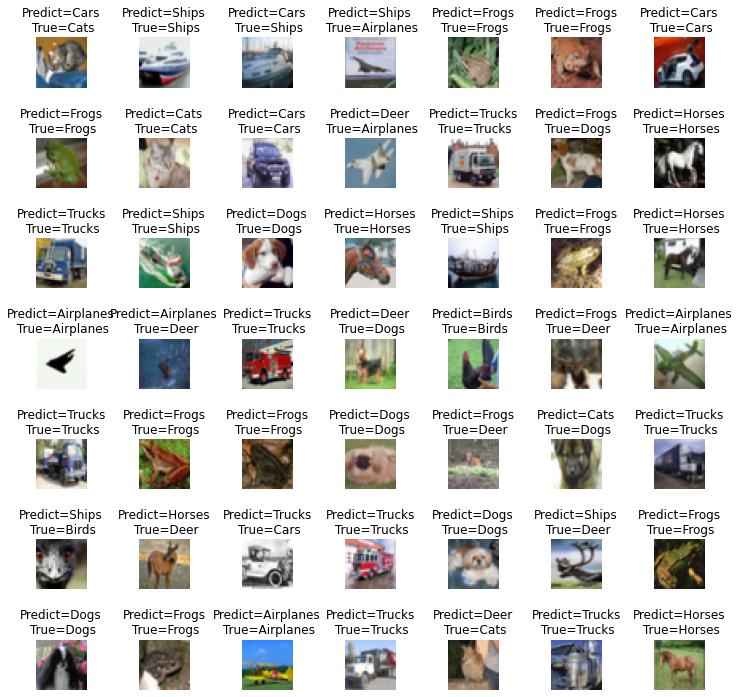

In [33]:
l=7
w=7
fig,axes = plt.subplots(l,w,figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0,l*w):
    axes[i].imshow(x_test_flt[i])
    axes[i].set_title('Predict={}\n True={}'.format(dict[str(prediction2[i])],dict[str(y_test[i])]))
    axes[i].axis('off')
plt.subplots_adjust(hspace = 1,wspace=1)

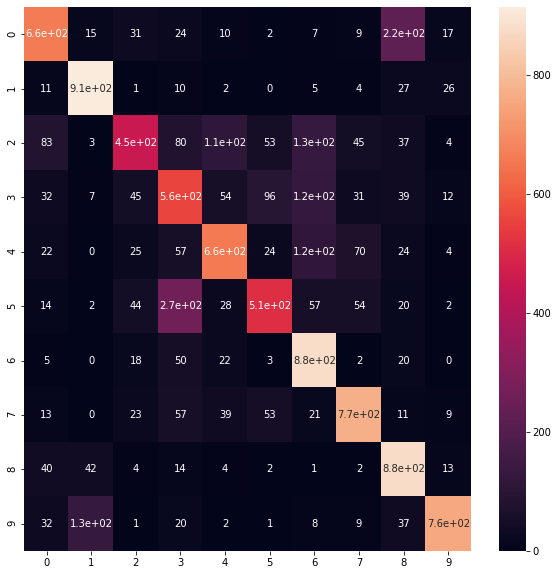

In [34]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction)
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot=True)

## save the model

In [0]:
import os
directory = os.path.join(os.getcwd(),'saved_models')
if not os.path.isdir(directory):
  os.makedirs(directory)
model_path=os.path.join(directory,'keras_cifar10_train_model.h5')
model.save(model_path)

Data augmentation dor the dataset

In [0]:
import keras
from keras.datasets import cifar10
(x_train1,y_train1),(x_test1,y_test1)=cifar10.load_data()

In [0]:
X_train1 = x_train1.astype('float32')
X_test1 = x_test1.astype('float32')

In [38]:
X_train1.shape

(50000, 32, 32, 3)

In [0]:
n=8
X_train_sample=X_train1[:n]

In [40]:
X_train_sample.shape

(8, 32, 32, 3)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

data_train = ImageDataGenerator(rotation_range = 90)
data_train.fit(x_train_flt)

In [42]:
#!pip install scipy==1.2.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


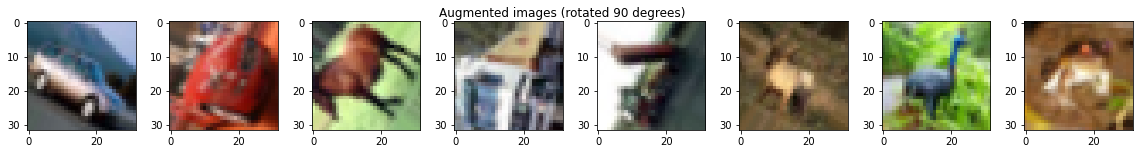

In [43]:
import scipy
from scipy.misc import toimage

fig = plt.figure(figsize = (20,2))
for x_batch in data_train.flow(X_train_sample,batch_size= n):
  for i  in range(0,n):
    ax=fig.add_subplot(1,n,i+1)
    ax.imshow(toimage(x_batch[i]))
  fig.suptitle('Augmented images (rotated 90 degrees)')
  plt.show()
  break;



In [0]:
data_gen=ImageDataGenerator(
    rotation_range = 90,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

In [0]:
data_gen.fit(x_train_flt)

In [82]:
model.fit_generator(data_gen.flow(x_train_flt,y_train,batch_size=32),epochs= 20)

Epoch 1/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.8591 - accuracy: 0.3413
Epoch 2/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.8273 - accuracy: 0.3591
Epoch 3/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.7394 - accuracy: 0.3783
Epoch 4/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.7115 - accuracy: 0.3916
Epoch 5/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.6999 - accuracy: 0.3989
Epoch 6/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.7364 - accuracy: 0.3966
Epoch 7/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.6829 - accuracy: 0.3980
Epoch 8/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.6667 - accuracy: 0.4111
Epoch 9/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.6816 - accuracy: 0.4096
Epoch 10/20
1563/1563 [==============================] - 26s 17m

In [48]:
y_test.shape

(10000,)

In [42]:
x_test_flt.shape

(10000, 32, 32, 3)

In [43]:
x_train_flt.shape

(50000, 32, 32, 3)

In [0]:
y_test1=y_test.reshape(-1,1)

In [84]:
score = model.evaluate(x_test_flt,y_test)
print("Test Accuracy",score[1])

10000/10000 [==============================] - 1s 101us/step
Test Accuracy 0.46389999985694885


In [86]:
score = model2.evaluate(x_test_flt,y_test)
print("Test Accuracy",score[1])

10000/10000 [==============================] - 1s 101us/step
Test Accuracy 0.6453999876976013
